In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [4]:
# Charger les données du fichier CSV
data = pd.read_csv('5_cycles_smoothed.csv')


In [ ]:
# Afficher graphiquement les données
def plot_data(data, x, y, title):
    plt.plot(data[x], data[y])
    plt.xlabel('Time (s)')
    plt.ylabel('CPU Temperature (°C)')
    plt.title(f'{y} en fonction de {x}')
    plt.grid(True)
    plt.show()

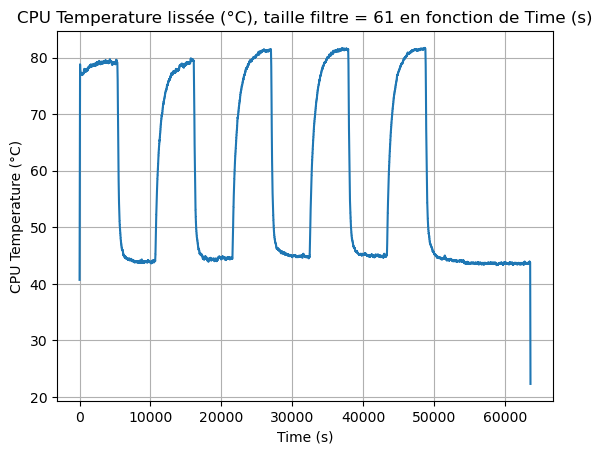

In [ ]:
# Afficher les données
time = 'Time (s)'
cpu_temp = 'CPU Temperature lissée (°C), taille filtre = 61'
plot_data(data, time, cpu_temp, 'Cyclage 5 fois')

In [ ]:
# Objet numpy
temp_array = np.array([data[time].values, data[cpu_temp].values])

In [ ]:
# Intervalles pour chaque cycle
intervals = [(5300, 10000), (16100, 20000), (26975, 31000), (37850, 42000), (48750, 55000)]

# Créer des listes vides pour stocker les masques et les tableaux résultants
masks = []
cycle_arrays = []

# Parcourir les intervalles et créer les masques et les tableaux correspondants
for i, (lower, upper) in enumerate(intervals):
    mask = (temp_array[0, :] >= lower) & (temp_array[0, :] <= upper)
    masks.append(mask)
    cycle_array = temp_array[:, mask]
    cycle_arrays.append(cycle_array)

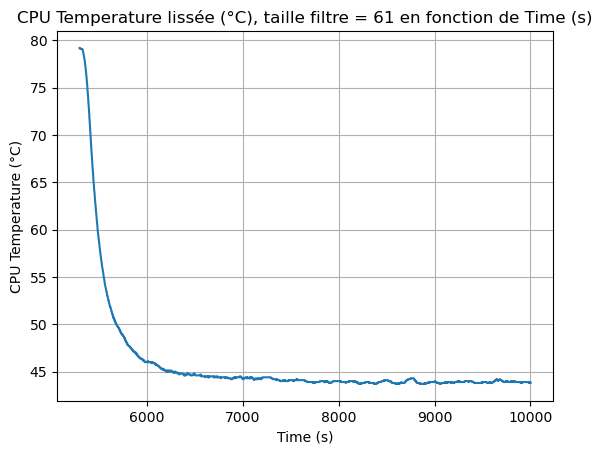

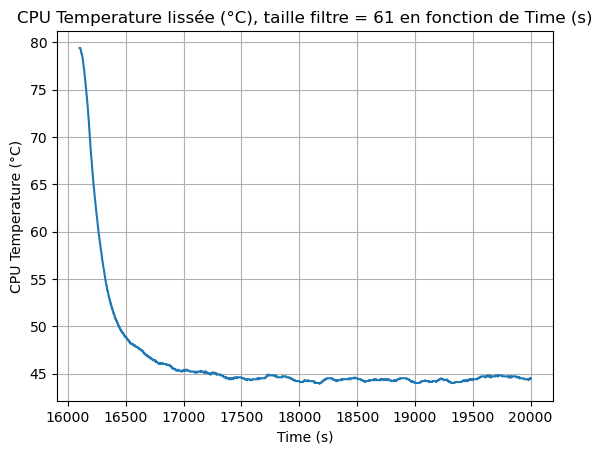

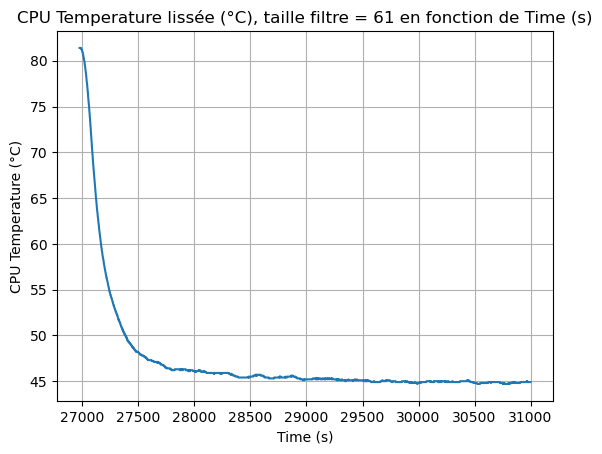

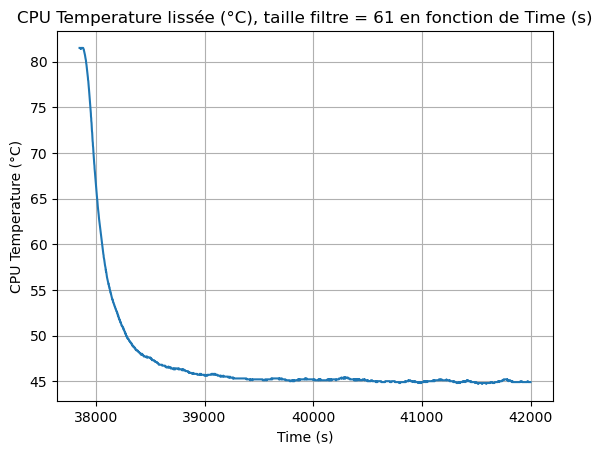

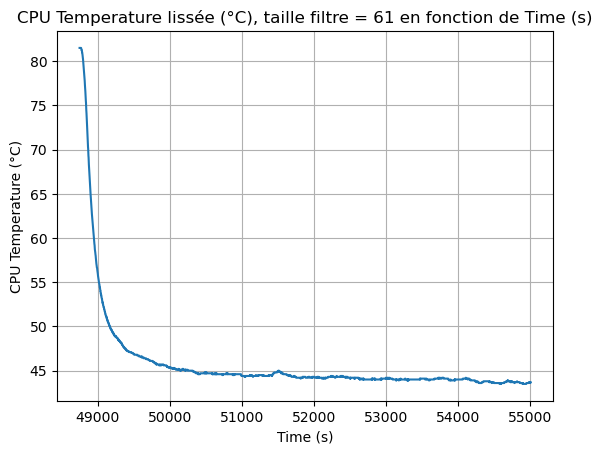

In [ ]:
# Afficher les graphes des cycles
for i, cycle_array in enumerate(cycle_arrays):
    cycle_number = i + 1
    cycle_data = pd.DataFrame(cycle_array.T, columns=[time, cpu_temp])
    plot_data(cycle_data, time, cpu_temp, f"Cycle {cycle_number}")

In [ ]:
# Liste pour stocker les valeurs maximales et minimales de la température du CPU pour chaque cycle
max_temps = []
min_temps = []

# Calculer la valeur maximale et minimale de la température du CPU pour chaque cycle
for cycle_array in cycle_arrays:
    max_temp = np.max(cycle_array[1])
    min_temp = np.min(cycle_array[1])
    max_temps.append(max_temp)
    min_temps.append(min_temp)

In [ ]:
# Afficher ces valeurs
for i, (max_temp, min_temp) in enumerate(zip(max_temps, min_temps)):
    cycle_number = i + 1
    print(f'Cycle {cycle_number} : Température maximale = {max_temp}°C, Température minimale = {min_temp}°C')

Cycle 1 : Température maximale = 79.2°C, Température minimale = 43.7°C
Cycle 2 : Température maximale = 79.4°C, Température minimale = 43.9°C
Cycle 3 : Température maximale = 81.4°C, Température minimale = 44.7°C
Cycle 4 : Température maximale = 81.5°C, Température minimale = 44.7°C
Cycle 5 : Température maximale = 81.5°C, Température minimale = 43.5°C


In [ ]:
# Calculer la moyenne des valeurs maximales des cycles
max_temp_mean = np.mean(max_temps).round(1)

# Calculer la moyenne des valeurs minimales des cycles
min_temp_mean = np.mean(min_temps).round(1)

# Afficher ces valeurs
print(f'Température moyenne maximale = {max_temp_mean}°C')
print(f'Température moyenne minimale = {min_temp_mean}°C')

Température moyenne maximale = 80.6°C
Température moyenne minimale = 44.1°C


In [ ]:
# Calculer la différence temps pour avoir atteint 95% de la température minimale par rapport à la température maximale pour chaque cycle
n_tau = 0.63 # 0.63 et 0.95

# Liste pour stocker les temps de réponse de chaque cycle
tr_values = []

# Calculer la différence temps pour avoir atteint 95% de la température minimale par rapport à la température maximale pour chaque cycle
for i, cycle_array in enumerate(cycle_arrays):
    max_temp = max_temps[i]
    min_temp = min_temps[i]
    threshold = (1 - n_tau) * (max_temp - min_temp) + min_temp
    max_time = cycle_array[0, np.where(cycle_array[1] == max_temp)[0][0]]
    tr_time = cycle_array[0, np.where(cycle_array[1] <= threshold)[0][0]]
    tr_value = abs(max_time - tr_time)
    tr_values.append(tr_value)

# Afficher ces valeurs
for i, tr_value in enumerate(tr_values):
    cycle_number = i + 1
    print(f'Cycle {cycle_number} : Temps de réponse = {tr_value} s')

Cycle 1 : Temps de réponse = 226.0 s
Cycle 2 : Temps de réponse = 196.0 s
Cycle 3 : Temps de réponse = 213.0 s
Cycle 4 : Temps de réponse = 227.0 s
Cycle 5 : Temps de réponse = 229.0 s


In [ ]:
# Moyenne des temps de réponse
tr_mean = np.mean(tr_values).round(1)
tr_max = np.max(tr_values).round(1)

# Afficher ces valeurs
print(f'Temps de réponse moyen = {tr_mean} s')
print(f'Temps de réponse maximal = {tr_max} s')

Temps de réponse moyen = 218.2 s
Temps de réponse maximal = 229.0 s
